# DSML Data Analysis Project - Group 4  
**_Predicting Traffic Volume from Ride-Hailing Trips in Chicago_**

*By Louis, Malak, Lena, and Eero*

---
## 📑 Table of Contents

1. Introduction/ Prediction Task
2. Business Understanding
3. Data Understanding
4. Data Preparation
   - Data Acquisition & Loading
   - Check Filter Application
   - Data Cleaning
   - Feature Engineering
5. Data Exploration
6. Descriptive Analysis
7. Modeling & Evaluation


---
## 🎯 Introduction/ Prediction Task

We aim to predict **trip duration** based on individual ride-hailing trips in Chicago, US (see our chosen dataset below in "Data Understanding").

Our first approach was to predict traffic volume. We wanted to derive this by dividing *trip seconds* by *trip miles*, representing the average duration per mile (higher values indicate greater congestion), thus indicating traffic volume/ defining a proxy for traffic volume.

After reconsideration and the first milestone's feedback we will predict only the trip duration, derived by `trip_seconds`.

We plan on including the following **features**:
- hour (extrcating from `trip_start_timestamp`)
- day of the week (from `trip_start_timestamp`)
- `pickup_community_area`
- `dropoff_community_area`
- `trip_seconds`
- `trip_miles`
- `trip_total` (excluding tips)
- weather data (optional, using another database)

---
## Business Understanding

**Ride-hailing services** use mobile apps such as Uber or Lyft to connect passengers to drivers, with the goal of providing **fast** and **cost-effective transportation** for users. Furthermore, reducing traffic congestion, lowering emissions, and increasing vehicle utilization are key incentives.

In **Chicago**, transit via bus and rail is on the rise. In **2023**, there was a total of **279.1 million rides**, marking a **13% increase from 2022**. Ride-hailing services have also seen **increased adoption**, especially in **downtown areas**. Fees for solo rides have even been implemented in the downtown area during peak times to encourage shared rides. Chicago remains one of the **most congested US cities**, especially during peak hours. Thus, the city is actively promoting shared mobility options, providing, for example, Divvy Bikes — a city-owned system for renting both bikes and scooters.

Hence, one could argue that predicting a variable like `trip duration` has real-world value, as it helps improve both operational efficiency and policy decisions, making it a high-impact use cas for data science. It is critical for multiple stakeholders:
- **Sellers:** Ride-hailing providers use it for accurate ETAs, efficient fleet deployment, and dynamic pricing.
- **End Users:** Passengers benefit from improved time estimates and service reliability.
- **Regulators:** City planners and policymakers can use this data to identify high-congestion areas and evaluate the effectiveness of traffic regulations or infrastructure changes.


---
## Data Understanding

**Dataset: Transportation Network Providers - Trips (2023–2024):**

https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2023-2024-/n26f-ihde/explore/query/SELECT%0A%20%20%60trip_id%60%2C%0A%20%20%60trip_start_timestamp%60%2C%0A%20%20%60trip_end_timestamp%60%2C%0A%20%20%60trip_seconds%60%2C%0A%20%20%60trip_miles%60%2C%0A%20%20%60percent_time_chicago%60%2C%0A%20%20%60percent_distance_chicago%60%2C%0A%20%20%60pickup_census_tract%60%2C%0A%20%20%60dropoff_census_tract%60%2C%0A%20%20%60pickup_community_area%60%2C%0A%20%20%60dropoff_community_area%60%2C%0A%20%20%60fare%60%2C%0A%20%20%60tip%60%2C%0A%20%20%60additional_charges%60%2C%0A%20%20%60trip_total%60%2C%0A%20%20%60shared_trip_authorized%60%2C%0A%20%20%60shared_trip_match%60%2C%0A%20%20%60trips_pooled%60%2C%0A%20%20%60pickup_centroid_latitude%60%2C%0A%20%20%60pickup_centroid_longitude%60%2C%0A%20%20%60pickup_centroid_location%60%2C%0A%20%20%60dropoff_centroid_latitude%60%2C%0A%20%20%60dropoff_centroid_longitude%60%2C%0A%20%20%60dropoff_centroid_location%60%0AORDER%20BY%20%60trip_start_timestamp%60%20DESC%20NULL%20FIRST/page/filter 

*(Data Provided ByCity of Chicago - Last Updated: February 27, 2025)*

> Additional Information from their Website:
>
> All trips in 2023-2024 reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of routine reporting required by ordinance. For earlier and later trips, see the links in the Featured Content section below. This version of the datasets contains three new columns, marked in their column descriptions.
>
>Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Fares are rounded to the nearest $2.50 and tips are rounded to the nearest $1.00.
>
>[https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2023-2024-/n26f-ihde/about_data]



The given dataset provides us with a total of 1,743,696 individual trips, including various features (24 columns). Below, we will go over each one and evaluate whether the feature will be useful for our prediction task, if we will only include data with a set value, or if it should be excluded during our data preparation.

- **Trip ID**: Will be included as our primary key, as it is the row/ trip identifier.

- **Trip Start Time** & **Trip End Time**: Useful to our prediction task. Time is an important factor for traffic volume, which spikes during peak hours.

- **Trip Seconds** & **Trip Miles**: Useful to our prediction task. Both are essential to our calculation of traffic volume.

- **Percent Time Chicago** & **Percent Distance Chicago**: Only trips with 100% will be included. Trips with routes outside of Chicago do not fit our prediction task of modeling traffic volume *in Chicago*.

- **Pickup Census Tract** & **Dropoff Census Tract**: Will be excluded. Compared to Pickup Community Area and Dropoff Community Area — which represent 77 large zones in Chicago — Census Tract identifies over 800 smaller zones. While more specific, they run a higher risk of missing data and reduce the likelihood of trips being comparable to each other.

- **Pickup Community Area** & **Dropoff Community Area**: Useful for our prediction task. Traffic volume varies by location, and these provide a robust feature for space.

- **Fare, Tip, Additional Charges, and Trip Total**: We will use trip total excluding tips, as this serves as an indicator of traffic congestion due to dynamic pricing used by apps such as Uber or Lyft. Only data with no tips will be used, as tipping is subjective and influenced by user generosity, culture, and driver service quality.

- **Shared Trips Authorized, Shared Trips Match, and Trips Pooled**: Only data from trips that were not shared will be used, as trips stopping for other passengers would impact trip seconds without being a clear indication of traffic volume.

- **Latitude, Longitude, and Location Coordinates**: Will be excluded for the same reasons as Census Tract — too specific and less useful for comparison for the prediction task.

---
## Data Preparation

We **filtered the raw data** according to our data requirements stated above via the Chicago Data Portal and ended up with **32,752,518 individual trips**.

### I. Data Acquisition & Loading

To reduce the data while preserving trips from different timeframes throughout 2023–2024, we initially considered to apply another filter base on the Trip ID — for example, including every trip containing "197." After discussion, we concluded this approach could introduce bias. We decided on downloading all rows and afterwards reducing the data to every 100th entry via a Python script. The script was written by ChatGPT.

In [ ]:
import pandas as pd
import requests
import time
from io import StringIO

# API-URL und Filter
base_url = "https://data.cityofchicago.org/resource/n26f-ihde.csv"
params_base = {
    "$where": "percent_time_chicago = 1 AND percent_distance_chicago = 1 AND tip = 0 AND shared_trip_authorized = false AND shared_trip_match = false",
    "$limit": 1000000
}

dfs = []
num_blocks = 34

for i in range(num_blocks):
    offset = i * 1_000_000
    params = params_base.copy()
    params["$offset"] = offset
    print(f"[{i+1}/{num_blocks}] Lade Daten ab Offset {offset:,} ...")

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        
        # Inhalt prüfen
        if len(response.text.strip()) == 0:
            print(f"⚠️  Keine Daten empfangen bei Block {i+1}.")
            break
        
        chunk = pd.read_csv(StringIO(response.text))
        dfs.append(chunk)
        print(f"✅ {len(chunk):,} Zeilen geladen.")
        time.sleep(1)

    except Exception as e:
        print(f"❌ Fehler bei Block {i+1}: {e}")
        print("Inhalt der Antwort:")
        print(response.text[:1000])  # Nur die ersten 1000 Zeichen zeigen
        break

# Nur fortfahren, wenn Daten vorhanden
if dfs:
    print("🔄 Zusammenführen der Blöcke ...")
    full_df = pd.concat(dfs, ignore_index=True)

    print("🔃 Sortiere nach trip_start_timestamp ...")
    full_df['trip_start_timestamp'] = pd.to_datetime(full_df['trip_start_timestamp'], errors='coerce')
    full_df = full_df.dropna(subset=['trip_start_timestamp'])
    full_df = full_df.sort_values(by='trip_start_timestamp')

    print("📊 Ziehe jede 100. Zeile ...")
    sample_df = full_df.iloc[::100]

    print(f"💾 Speichere Datei mit {len(sample_df):,} Zeilen ...")
    sample_df.to_csv("Ridehailing_Chicago_sample327k.csv", index=False)
    print("✅ Fertig!")
else:
    print("❌ Keine Daten zum Verarbeiten.")


[1/34] Lade Daten ab Offset 0 ...
✅ 1,000,000 Zeilen geladen.
[2/34] Lade Daten ab Offset 1,000,000 ...
✅ 1,000,000 Zeilen geladen.
[3/34] Lade Daten ab Offset 2,000,000 ...
✅ 1,000,000 Zeilen geladen.
[4/34] Lade Daten ab Offset 3,000,000 ...
✅ 1,000,000 Zeilen geladen.
[5/34] Lade Daten ab Offset 4,000,000 ...
✅ 1,000,000 Zeilen geladen.
[6/34] Lade Daten ab Offset 5,000,000 ...
✅ 1,000,000 Zeilen geladen.
[7/34] Lade Daten ab Offset 6,000,000 ...
✅ 1,000,000 Zeilen geladen.
[8/34] Lade Daten ab Offset 7,000,000 ...
✅ 1,000,000 Zeilen geladen.
[9/34] Lade Daten ab Offset 8,000,000 ...
✅ 1,000,000 Zeilen geladen.
[10/34] Lade Daten ab Offset 9,000,000 ...
✅ 1,000,000 Zeilen geladen.
[11/34] Lade Daten ab Offset 10,000,000 ...
✅ 1,000,000 Zeilen geladen.
[12/34] Lade Daten ab Offset 11,000,000 ...
✅ 1,000,000 Zeilen geladen.
[13/34] Lade Daten ab Offset 12,000,000 ...
✅ 1,000,000 Zeilen geladen.
[14/34] Lade Daten ab Offset 13,000,000 ...
✅ 1,000,000 Zeilen geladen.
[15/34] Lade Daten 

C:\Users\louis\AppData\Local\Temp\ipykernel_18968\571679300.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(dfs, ignore_index=True)


🔃 Sortiere nach trip_start_timestamp ...
📊 Ziehe jede 100. Zeile ...
💾 Speichere Datei mit 327,526 Zeilen ...
✅ Fertig!


We **now** have **327,526 individual trips** to work with, fulfilling the condition of at least 100,000 rows in the raw data. With 77 different area codes — each for pickup and dropoff — this results in an average of approximately 55 identical trips per unique pickup–dropoff area code combination.

After **exporting**, we will **load/ read-in the data**, check our filter application, inspect the data structure, clean the data, and do some feature engineering before moving on to modeling.

In [ ]:
# Import pandas (if not already) and numpy for starters
# "main tool to structure, manipulate and store data throughout this course." - WS_03
import pandas as pd
import numpy as np

# Read the created .csv file
rds = pd.read_csv("Ridehailing_Chicago_sample327k.csv")

### II. Check Filter Application 

We want to check if the following filters were applied accordingly:

- 100% of the trip was driven in Chicago
- No tip
- No shared driving

In [35]:
rds['percent_time_chicago'] = rds['percent_time_chicago'].astype(str)
rds['percent_distance_chicago'] = rds['percent_distance_chicago'].astype(str)

all_conditions_met = (
    (rds['shared_trip_match'] == False) &
    (rds['shared_trip_authorized'] == False) &
    (rds['tip'] == 0) &
    (rds['percent_time_chicago'] == '1') &
    (rds['percent_distance_chicago'] == '1')
)

print("All rows match filters:", all_conditions_met.all())

All rows match filters: True


### III. Data Cleaning 🧼

This part will include…
- Pre-Cleaning Exploartion
- A. Dropping Unnecessary Columns
- B. Filtering Out Null Values
- C. Removing Duplicate Rows
- D. Handling Outliers

#### Pre-Cleaning Exploration

Before cleaning, we want to do some inspection of the structure and content of the data using key Pandas commands:

- `.info()` – to get an overview/ check column types and null values
- `.describe()` – to understand some distributions and scale
- `.head()` – to get a preview of the data/ first few rows
- `.value_counts()` – to explore categorical distributions

This inspection helps us decide which columns need cleaning, transformation, or removal.

In [ ]:
# Overview
rds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trip_id                     200000 non-null  object 
 1   trip_start_timestamp        200000 non-null  object 
 2   trip_end_timestamp          200000 non-null  object 
 3   trip_seconds                200000 non-null  int64  
 4   trip_miles                  200000 non-null  float64
 5   percent_time_chicago        200000 non-null  object 
 6   percent_distance_chicago    200000 non-null  object 
 7   pickup_census_tract         124585 non-null  float64
 8   dropoff_census_tract        124390 non-null  float64
 9   pickup_community_area       187669 non-null  float64
 10  dropoff_community_area      186788 non-null  float64
 11  fare                        200000 non-null  float64
 12  tip                         200000 non-null  int64  
 13  additional_cha

This shows us that there are quite a few *null values* in the records for some other variables, prettymuch mainly location data, like `census_tract` and `community_area`.

Concerning the **datatypes**, it also tells us that we will have to *change the datatype* of both the **timestamps**.

In [ ]:
# A stats-summary for the numeric columns
rds.describe()


,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
count,200000.000000,200000.000000,1.245850e+05,1.243900e+05,187669.000000,186788.000000,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,188079.000000,188079.000000,187142.000000,187142.000000
mean,959.718460,5.200121,1.703139e+10,1.703140e+10,28.165808,28.448209,15.928975,0.0,2.243836,18.172811,1.000005,41.877555,-87.663099,41.877739,-87.663453
std,703.514667,5.826999,3.299629e+05,3.303762e+05,20.640565,20.672643,11.094258,0.0,2.247585,12.010604,0.002236,0.071364,0.061423,0.071047,0.062880
min,1.000000,0.003000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,489.000000,1.620000,1.703108e+10,1.703108e+10,8.000000,8.000000,10.000000,0.0,1.230000,11.230000,1.000000,41.842076,-87.680878,41.849247,-87.680162
50%,761.000000,3.120000,1.703128e+10,1.703128e+10,26.000000,28.000000,12.500000,0.0,1.230000,13.790000,1.000000,41.891972,-87.651409,41.890922,-87.651062
75%,1220.000000,6.270000,1.703183e+10,1.703183e+10,41.000000,41.000000,20.000000,0.0,2.980000,21.230000,1.000000,41.922761,-87.626215,41.922761,-87.626215
max,13542.000000,89.100000,1.703198e+10,1.703198e+10,77.000000,77.000000,255.000000,0.0,156.230000,262.880000,2.000000,42.021224,-87.529950,42.021224,-87.530712


This summary is also quite interesting to see, once again showing we'll have some **rows with missing data** (see the count row of the created table).

We also get insights about the **trip duration calculations**, e.g the **average of 959 seconds (~16 min)**. We observe a right-skewed distribution (rechtsschiefe Verteilung), with  mean apparently being **higher than the median (50% 761 seconds or ~12.5 min)**, suggesting for instance presence of longer-duration outlier trips pulling the average up. While **most trips** seem to be **between 8 and 20 minutes** long (25th to 75th percentile: 489 to 1,220 seconds), some extreme values/ the minimum of just 1 second and maximum of ~4 hours — may indicate **data entry errors or edge cases**.

So, another next step is outlier detection/ handeling, as extremely short or unusually long trips are likely not representative of typical ride-hailing patterns and may negatively impact model performance (hopefully we are allowed to do so). 

As we wanted the `tip` column to be zero for all of our records, that column is more or less **useless**, as we **previously filtered the data**. So, we'll have to remember to remove that column. The same goes for the `trips_pooled` variblae, as we filtered all trips to be no shared driving trips with another customer.


In [ ]:
# Show first few rows
rds.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,...,trip_total,shared_trip_authorized,shared_trip_match,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,e19d582c49faf00c58085a7e12b9387026980d1b,2023-02-01 00:00:00,2023-02-01T00:15:00.000,777,2.48,1,1,NaN,NaN,6.0,...,13.79,False,False,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
1,74eb85994b583bfe8e29bb9c7693b8e6a31b65cd,2023-02-01 00:00:00,2023-02-01T00:15:00.000,600,3.44,1,1,NaN,NaN,52.0,...,13.79,False,False,1,41.707311,-87.534903,POINT (-87.5349029012 41.707311449),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
2,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01T00:15:00.000,224,0.68,1,1,1.703108e+10,1.703108e+10,8.0,...,16.29,False,False,1,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
3,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01T00:45:00.000,276,1.48,1,1,1.703184e+10,1.703184e+10,28.0,...,16.29,False,False,1,41.863118,-87.672920,POINT (-87.672920435 41.8631181033),41.867902,-87.642959,POINT (-87.6429586652 41.8679024175)
4,5433bd1ef9615dc10a4a0a1d89cfb181c7378e5f,2023-02-01 00:45:00,2023-02-01T01:00:00.000,444,1.50,1,1,NaN,NaN,3.0,...,8.79,False,False,1,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


#### A. Dropping Unnecessary Columns 🗑️

**After applying strict filters** to focus on non-shared, solo rides that stayed entirely within Chicago and had no tips, **several columns** (shared_trip_match, shared_trip_authorized, tip, percent_time_chicago, and percent_distance_chicago) **became constant** across all remaining records. 

These columns no longer provide any useful information for modeling or analysis, so they were removed to simplify the dataset and reduce dimensionality.

In [36]:
# Drop columns that are constant bc of our filtering
columns_to_drop = [
    'shared_trip_match',
    'shared_trip_authorized',
    'tip',
    'percent_time_chicago',
    'percent_distance_chicago'
]

# Drop them from rds
rds.drop(columns=columns_to_drop, inplace=True) 
# side note: inplace=True means means "perform the operation directly on the original DataFrame without creating a new one."

print(f"Dropped columns: {columns_to_drop}")
rds

Dropped columns: ['shared_trip_match', 'shared_trip_authorized', 'tip', 'percent_time_chicago', 'percent_distance_chicago']


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,e19d582c49faf00c58085a7e12b9387026980d1b,2023-02-01 00:00:00,2023-02-01T00:15:00.000,777,2.48,NaN,NaN,6.0,3.0,12.5,1.29,13.79,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
1,74eb85994b583bfe8e29bb9c7693b8e6a31b65cd,2023-02-01 00:00:00,2023-02-01T00:15:00.000,600,3.44,NaN,NaN,52.0,51.0,12.5,1.29,13.79,1,41.707311,-87.534903,POINT (-87.5349029012 41.707311449),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
2,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01T00:15:00.000,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,1.29,16.29,1,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
3,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01T00:45:00.000,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,1.29,16.29,1,41.863118,-87.672920,POINT (-87.672920435 41.8631181033),41.867902,-87.642959,POINT (-87.6429586652 41.8679024175)
4,5433bd1ef9615dc10a4a0a1d89cfb181c7378e5f,2023-02-01 00:45:00,2023-02-01T01:00:00.000,444,1.50,NaN,NaN,3.0,3.0,7.5,1.29,8.79,1,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31T00:00:00.000,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,1.23,16.23,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.921126,-87.699754,POINT (-87.6997544065 41.9211259143)
199996,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30T23:45:00.000,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,1.23,6.23,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
199997,5b6b920e650d45f39e17249512bc856aa98b4830,2024-12-30 23:45:00,2024-12-31T00:15:00.000,1458,13.53,1.703198e+10,NaN,76.0,NaN,42.5,6.23,48.73,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
199998,4353c7e980aebda70aa70044a0c2cd401ca88147,2024-12-30 23:45:00,2024-12-31T00:00:00.000,835,3.37,1.703128e+10,1.703107e+10,28.0,7.0,10.0,1.23,11.23,1,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.922083,-87.634156,POINT (-87.6341560931 41.922082541)


#### B. Filtering Out Null Values 🗑️

In [37]:
# Show amount of null values in each column
print("Null values per column:")
print(rds.isnull().sum())

# Display rows with any null values
print("\nRows with null values:")
display(rds[rds.isnull().any(axis=1)])

# Remove rows with any null values
rds_cleaned = rds.dropna()
print("\nDataset now:")
rds_cleaned # Now we're left with a bit over 100k rows (118.486)

Null values per column:
trip_id                           0
trip_start_timestamp              0
trip_end_timestamp                0
trip_seconds                      0
trip_miles                        0
pickup_census_tract           75415
dropoff_census_tract          75610
pickup_community_area         12331
dropoff_community_area        13212
fare                              0
additional_charges                0
trip_total                        0
trips_pooled                      0
pickup_centroid_latitude      11921
pickup_centroid_longitude     11921
pickup_centroid_location      11921
dropoff_centroid_latitude     12858
dropoff_centroid_longitude    12858
dropoff_centroid_location     12858
dtype: int64

Rows with null values:


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,e19d582c49faf00c58085a7e12b9387026980d1b,2023-02-01 00:00:00,2023-02-01T00:15:00.000,777,2.48,NaN,NaN,6.0,3.0,12.5,1.29,13.79,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
1,74eb85994b583bfe8e29bb9c7693b8e6a31b65cd,2023-02-01 00:00:00,2023-02-01T00:15:00.000,600,3.44,NaN,NaN,52.0,51.0,12.5,1.29,13.79,1,41.707311,-87.534903,POINT (-87.5349029012 41.707311449),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
4,5433bd1ef9615dc10a4a0a1d89cfb181c7378e5f,2023-02-01 00:45:00,2023-02-01T01:00:00.000,444,1.50,NaN,NaN,3.0,3.0,7.5,1.29,8.79,1,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
6,98ec80e5c545c85ecaa4c3486e708b7aa978fb17,2023-02-01 01:30:00,2023-02-01T01:45:00.000,663,4.16,NaN,NaN,76.0,NaN,17.5,6.29,23.79,1,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
7,66c92cdce11ede804595059ae5deee38dd60d0e0,2023-02-01 02:00:00,2023-02-01T02:15:00.000,1471,9.27,NaN,NaN,NaN,64.0,17.5,1.29,18.79,1,NaN,NaN,NaN,41.779583,-87.768511,POINT (-87.768510849 41.7795828877)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,a1e8292683f8581b3390046b6b51cc86c3b1f943,2024-12-30 23:30:00,2024-12-30T23:45:00.000,765,2.18,NaN,NaN,6.0,7.0,7.5,1.23,8.73,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
199989,99930c94113e0bbb50541101a4b033025e4d1252,2024-12-30 23:30:00,2024-12-30T23:30:00.000,575,2.79,NaN,NaN,32.0,31.0,15.0,1.23,16.23,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.850266,-87.667569,POINT (-87.667569312 41.8502663663)
199993,2af2537d8e43314abccd15fb4844293ba71dce63,2024-12-30 23:45:00,2024-12-31T00:00:00.000,739,3.47,NaN,NaN,1.0,3.0,10.0,1.23,11.23,1,42.009623,-87.670167,POINT (-87.6701668569 42.0096228806),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
199997,5b6b920e650d45f39e17249512bc856aa98b4830,2024-12-30 23:45:00,2024-12-31T00:15:00.000,1458,13.53,1.703198e+10,NaN,76.0,NaN,42.5,6.23,48.73,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN



Dataset now:


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
2,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01T00:15:00.000,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,1.29,16.29,1,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
3,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01T00:45:00.000,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,1.29,16.29,1,41.863118,-87.672920,POINT (-87.672920435 41.8631181033),41.867902,-87.642959,POINT (-87.6429586652 41.8679024175)
5,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01T01:30:00.000,386,1.09,1.703133e+10,1.703133e+10,33.0,33.0,10.0,1.29,11.29,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
14,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01T05:30:00.000,1174,11.12,1.703128e+10,1.703198e+10,28.0,56.0,40.0,6.29,46.29,1,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
16,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01T05:45:00.000,182,0.39,1.703184e+10,1.703132e+10,32.0,32.0,12.5,1.29,13.79,1,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199992,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30T23:45:00.000,296,1.03,1.703106e+10,1.703106e+10,6.0,6.0,5.0,1.23,6.23,1,41.942585,-87.656644,POINT (-87.6566440918 41.9425851797),41.936310,-87.651563,POINT (-87.6515625922 41.9363101308)
199994,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30T23:45:00.000,283,0.71,1.703184e+10,1.703108e+10,24.0,8.0,5.0,1.23,6.23,1,41.898306,-87.653614,POINT (-87.6536139825 41.8983058696),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
199995,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31T00:00:00.000,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,1.23,16.23,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.921126,-87.699754,POINT (-87.6997544065 41.9211259143)
199996,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30T23:45:00.000,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,1.23,6.23,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)


#### C. Removing Duplicate Rows 🔎

In [38]:
# 1) Check for exact duplicate rows: Show number of duplicates & display them
print(f"Number of exact duplicate rows: {rds_cleaned.duplicated().sum()}")
print("\nDuplicate rows:")

display(rds_cleaned[rds_cleaned.duplicated(keep=False)]) 
# default is .duplicated(keep='first'), excluding the first occurrence, 
# but this is including for clearer presentation

# Remove duplicates
rds_cleaned = rds_cleaned.drop_duplicates()

# Confirm duplicates are removed
print("\nNumber of exact duplicates after cleaning:", rds_cleaned.duplicated().sum())

print("\nDataset now: ")
rds_cleaned # 118.289 rows now

Number of exact duplicate rows: 197

Duplicate rows:


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
9603,bc60c695ce6bb95ab59c7094089498b3f1d47eee,2023-03-31 16:45:00,2023-03-31T17:00:00.000,157,0.580,1.703144e+10,1.703169e+10,44.0,69.0,7.5,1.23,8.73,1,41.748211,-87.610075,POINT (-87.6100749663 41.7482105124),41.754846,-87.610169,POINT (-87.6101685859 41.7548461015)
9611,bc60c695ce6bb95ab59c7094089498b3f1d47eee,2023-03-31 16:45:00,2023-03-31T17:00:00.000,157,0.580,1.703144e+10,1.703169e+10,44.0,69.0,7.5,1.23,8.73,1,41.748211,-87.610075,POINT (-87.6100749663 41.7482105124),41.754846,-87.610169,POINT (-87.6101685859 41.7548461015)
10305,e6077664d8f74f1657ede904428239602f7d965b,2023-04-01 18:15:00,2023-04-01T18:30:00.000,1286,4.200,1.703106e+10,1.703183e+10,6.0,28.0,15.0,1.23,16.23,1,41.934762,-87.639854,POINT (-87.6398538587 41.9347624564),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)
10310,e6077664d8f74f1657ede904428239602f7d965b,2023-04-01 18:15:00,2023-04-01T18:30:00.000,1286,4.200,1.703106e+10,1.703183e+10,6.0,28.0,15.0,1.23,16.23,1,41.934762,-87.639854,POINT (-87.6398538587 41.9347624564),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)
11736,c569e031393393dd7a6e71ff1edb9e7dae980eb3,2023-04-04 17:15:00,2023-04-04T17:15:00.000,373,0.950,1.703141e+10,1.703141e+10,41.0,41.0,10.0,1.23,11.23,1,41.790567,-87.594015,POINT (-87.5940154442 41.7905666284),41.798042,-87.594197,POINT (-87.5941966274 41.7980417164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197267,54623d3c78a47291a2de8d514bbfea6831d8ce45,2024-12-26 19:45:00,2024-12-26T20:00:00.000,596,5.050,1.703184e+10,1.703139e+10,34.0,39.0,12.5,1.23,13.73,1,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),41.805912,-87.587479,POINT (-87.5874792581 41.8059116993)
198709,84c3fb5ed090fc24fbedae46e43a2c91f85d285d,2024-12-28 22:45:00,2024-12-28T23:00:00.000,1270,4.649,1.703122e+10,1.703184e+10,22.0,29.0,10.0,6.69,16.69,1,41.915613,-87.704480,POINT (-87.7044795753 41.9156132381),41.868132,-87.714215,POINT (-87.7142147077 41.8681324282)
198713,84c3fb5ed090fc24fbedae46e43a2c91f85d285d,2024-12-28 22:45:00,2024-12-28T23:00:00.000,1270,4.649,1.703122e+10,1.703184e+10,22.0,29.0,10.0,6.69,16.69,1,41.915613,-87.704480,POINT (-87.7044795753 41.9156132381),41.868132,-87.714215,POINT (-87.7142147077 41.8681324282)
199307,5a58fe2d1e72d1526e87a25904f5d5f5f7b07836,2024-12-29 21:00:00,2024-12-29T21:00:00.000,368,0.960,1.703128e+10,1.703132e+10,28.0,32.0,7.5,1.23,8.73,1,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)



Number of exact duplicates after cleaning: 0

Dataset now: 


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
2,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01T00:15:00.000,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,1.29,16.29,1,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
3,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01T00:45:00.000,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,1.29,16.29,1,41.863118,-87.672920,POINT (-87.672920435 41.8631181033),41.867902,-87.642959,POINT (-87.6429586652 41.8679024175)
5,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01T01:30:00.000,386,1.09,1.703133e+10,1.703133e+10,33.0,33.0,10.0,1.29,11.29,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
14,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01T05:30:00.000,1174,11.12,1.703128e+10,1.703198e+10,28.0,56.0,40.0,6.29,46.29,1,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
16,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01T05:45:00.000,182,0.39,1.703184e+10,1.703132e+10,32.0,32.0,12.5,1.29,13.79,1,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199992,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30T23:45:00.000,296,1.03,1.703106e+10,1.703106e+10,6.0,6.0,5.0,1.23,6.23,1,41.942585,-87.656644,POINT (-87.6566440918 41.9425851797),41.936310,-87.651563,POINT (-87.6515625922 41.9363101308)
199994,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30T23:45:00.000,283,0.71,1.703184e+10,1.703108e+10,24.0,8.0,5.0,1.23,6.23,1,41.898306,-87.653614,POINT (-87.6536139825 41.8983058696),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
199995,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31T00:00:00.000,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,1.23,16.23,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.921126,-87.699754,POINT (-87.6997544065 41.9211259143)
199996,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30T23:45:00.000,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,1.23,6.23,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)


In [ ]:
# 2) Check for rows with duplicate trip IDs specifically (bc trip ID should be unique)
duplicate_trip_ids = rds_cleaned[rds_cleaned['trip_id'].duplicated()] # excluding the first occurrence
print(f"\nNumber of duplicate trip_id rows: {len(duplicate_trip_ids)}")
# rds_cleaned[rds_cleaned['trip_id'].duplicated()].sum() shows a table


Number of duplicate trip_id rows: 0


#### D. Handling Outliers 📊

Before getting the idea of identifying outliers, we initially wanted to just *remove trips where `trip_miles` or `trip_seconds` were equal to 0*, as such entries are clearly invalid (e.g., vehicle never moved or recording error). Then we thought to check if there was any need to remove rows in the first place.

In [39]:
# Check for rows that have zero trip_miles or trip_seconds
zero_miles = (rds_cleaned['trip_miles'] == 0).sum()
zero_seconds = (rds_cleaned['trip_seconds'] == 0).sum()

print(f"Rows with trip_miles == 0: {zero_miles}")
print(f"Rows with trip_seconds == 0: {zero_seconds}")
# No need to remove any, since result says there are none
# Otherwise: Remove rows with invalid 0 trip_miles or trip_seconds
# rds_cleaned = rds_cleaned[(rds_cleaned['trip_miles'] > 0) & (rds_cleaned['trip_seconds'] > 0)]

Rows with trip_miles == 0: 0
Rows with trip_seconds == 0: 0


We then tried to do more **statistically correct** outlier handling for `trip_seconds` and `trip_miles`, by **analyzing the distributions** of trip_miles and trip_seconds and **identifying extreme values** beyond the 1st and 99th percentiles. 

These outlier values are, in principle, acceptable, but are extreme (unusually long or short trips) and can be considered out-of-the-ordinary, rare edge case data or potentially faulty data, e.g. may be logged by accident - At least that is what we thought (so, hopefully we were allowed to do so). These values may have a (overly) strong and unrepresentative impact on the visualizations and predictive models.

After some inspection and quantile-based filtering, we kept the central 99% of the data/ discarded the extremal 1% (0.5% of top and bottom), potentially (hopefully) improving the dataset’s robustness for modeling. Visual comparisons, done *by ChatGPT*, before and after removal of the outliers confirm the improved consistency of trip data.

Quantile Thresholds: 
trip_miles lower 0.5% quantile: 0.34
trip_miles upper 99.5% quantile: 19.925599999999978
trip_seconds lower 0.5% quantile: 129.0
trip_seconds upper 99.5% quantile: 3730.0

Extreme trip_miles: 1158 rows
Extreme trip_seconds: 1173 rows



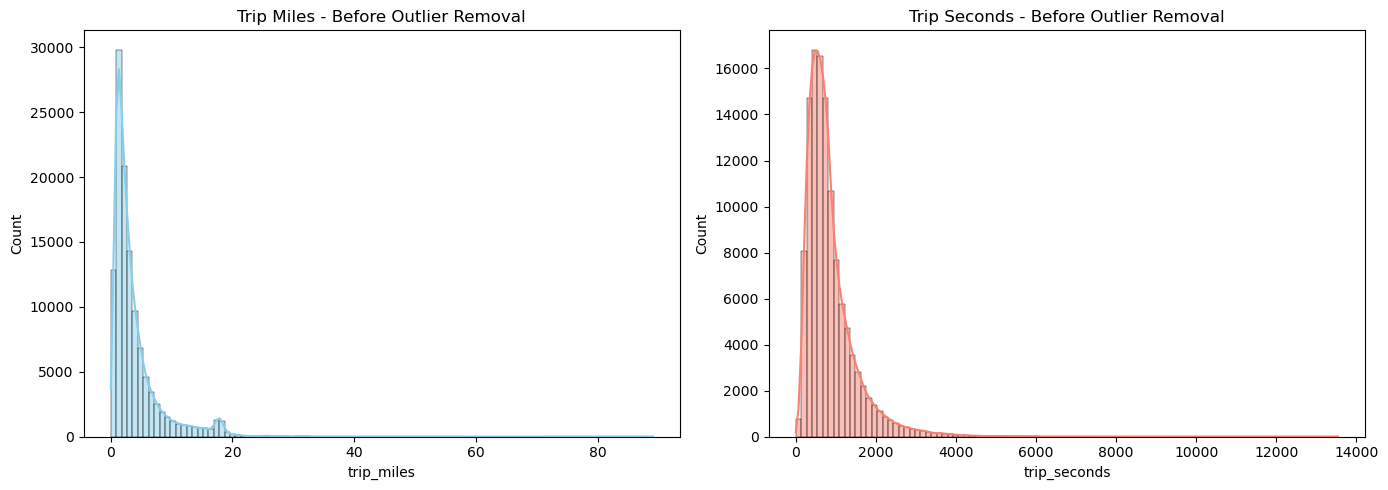

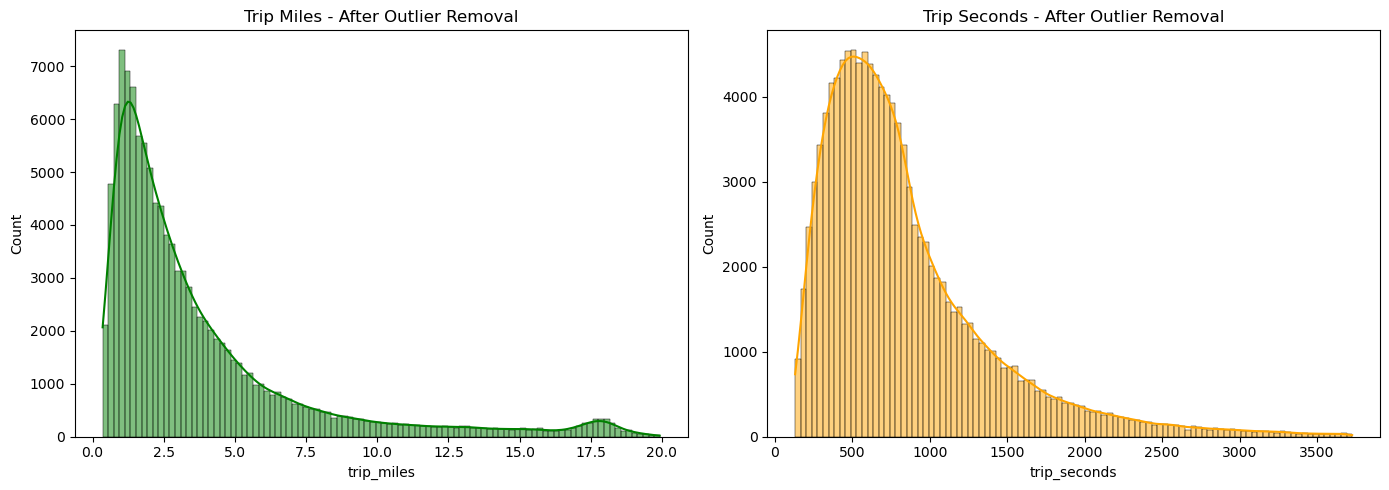

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining quantiles/ identifying extreme values using quantiles (help from: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe)
q_low_miles = rds_cleaned['trip_miles'].quantile(0.005)
q_hi_miles = rds_cleaned['trip_miles'].quantile(0.995)
q_low_seconds = rds_cleaned['trip_seconds'].quantile(0.005)
q_hi_seconds = rds_cleaned['trip_seconds'].quantile(0.995)

# Print the thresholds
print("Quantile Thresholds: ")
print(f"trip_miles lower 0.5% quantile: {q_low_miles}")
print(f"trip_miles upper 99.5% quantile: {q_hi_miles}")
print(f"trip_seconds lower 0.5% quantile: {q_low_seconds}")
print(f"trip_seconds upper 99.5% quantile: {q_hi_seconds}")

# Find out how many trips are outside "normal" range
extreme_miles = rds_cleaned[(rds_cleaned['trip_miles'] < q_low_miles) | (rds_cleaned['trip_miles'] > q_hi_miles)]
extreme_seconds = rds_cleaned[(rds_cleaned['trip_seconds'] < q_low_seconds) | (rds_cleaned['trip_seconds'] > q_hi_seconds)]
print(f"\nExtreme trip_miles: {len(extreme_miles)} rows")
print(f"Extreme trip_seconds: {len(extreme_seconds)} rows\n")

# Visualize before filtering (by ChatGPT)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(rds_cleaned['trip_miles'], bins=100, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Trip Miles - Before Outlier Removal')
sns.histplot(rds_cleaned['trip_seconds'], bins=100, kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Trip Seconds - Before Outlier Removal')
plt.tight_layout()
plt.show()

# Filter out the outliers (outside 1st and 99th percentiles)
rds_cleaned = rds_cleaned[
    (rds_cleaned['trip_miles'] > q_low_miles) & (rds_cleaned['trip_miles'] < q_hi_miles) &
    (rds_cleaned['trip_seconds'] > q_low_seconds) & (rds_cleaned['trip_seconds'] < q_hi_seconds)
]

# Visualize after (by ChatGPT)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(rds_cleaned['trip_miles'], bins=100, kde=True, ax=axs[0], color='green')
axs[0].set_title('Trip Miles - After Outlier Removal')
sns.histplot(rds_cleaned['trip_seconds'], bins=100, kde=True, ax=axs[1], color='orange')
axs[1].set_title('Trip Seconds - After Outlier Removal')
plt.tight_layout()
plt.show()

**Exploring Other "Non-Sensical" Records**

After outlier handling, we thought about other variables that could result in non-sensical outlier data, e.g. if the fare costs or total trip costs equal to 0$.
Apparently, there are few rows where that condition is met (see below). 

Even though those could be erroneus records, we decided to keep them, since they could simply indicate free rides or promotional offers. Apart from that the outliers for trip_seconds and trip_miles were far more relevant to catch and we thought them to be more important to handle delicately and cautiously.

In [41]:
#print("Data, where fare-costs = 0$:")
#rds_cleaned[rds_cleaned['fare'] == 0]

print("\nData, where total = 0$:")
rds_cleaned[rds_cleaned['trip_total'] == 0]



Data, where total = 0$:


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
107257,da34a1d6eb7f7c4281464da6bd6c9daf7f4606e9,2024-05-02 20:15:00,2024-05-02T20:15:00.000,405,1.38,1.703103e+10,1.703103e+10,77.0,3.0,0.0,0.0,0.0,1,41.985472,-87.653794,POINT (-87.6537935286 41.9854724225),41.972710,-87.657341,POINT (-87.6573411073 41.9727095466)
110308,a5477a31a5882204f5769d4ce6fc4e1304279c55,2024-05-13 09:00:00,2024-05-13T09:15:00.000,1251,4.84,1.703106e+10,1.703114e+10,6.0,14.0,0.0,0.0,0.0,1,41.952719,-87.660504,POINT (-87.6605035019 41.952719111),41.971539,-87.738937,POINT (-87.7389372047 41.97153938)
110801,f9e6324354d59c49bbb831cf438950119998cdc7,2024-05-15 10:00:00,2024-05-15T10:30:00.000,1390,9.15,1.703168e+10,1.703184e+10,68.0,28.0,0.0,0.0,0.0,1,41.769190,-87.638497,POINT (-87.6384969156 41.7691898164),41.870415,-87.675086,POINT (-87.6750856208 41.8704150003)
115746,15e858b3aed0d37c19b64379b3445aca3fe49e29,2024-05-31 18:15:00,2024-05-31T19:00:00.000,2557,9.93,1.703184e+10,1.703116e+10,34.0,16.0,0.0,0.0,0.0,1,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),41.949974,-87.730684,POINT (-87.7306842554 41.9499744545)
116113,bdced6d3d510be85ab05a556c30c5a36afe3ae0f,2024-06-01 08:15:00,2024-06-01T08:30:00.000,515,1.46,1.703183e+10,1.703143e+10,43.0,43.0,0.0,0.0,0.0,1,41.755568,-87.583607,POINT (-87.5836072899 41.7555681774),41.758408,-87.562847,POINT (-87.5628473838 41.7584079022)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194370,49e571e9575a4fa532eed9155b6709bb8c62a7f0,2024-12-21 14:15:00,2024-12-21T14:30:00.000,989,4.79,1.703166e+10,1.703173e+10,66.0,73.0,0.0,0.0,0.0,1,41.773848,-87.681095,POINT (-87.6810946628 41.7738480353),41.726835,-87.657899,POINT (-87.6578992921 41.7268354017)
196413,18f77937a65d54522552361d97bab84d8399789d,2024-12-24 19:30:00,2024-12-24T20:00:00.000,1266,9.35,1.703149e+10,1.703139e+10,49.0,39.0,0.0,0.0,0.0,1,41.703280,-87.615326,POINT (-87.6153264942 41.7032802648),41.805925,-87.604059,POINT (-87.6040586249 41.8059249688)
197758,271d130181807c5b3a7e22cbd488ddae3a637563,2024-12-27 16:30:00,2024-12-27T17:00:00.000,1942,6.99,1.703105e+10,1.703126e+10,5.0,26.0,0.0,0.0,0.0,1,41.950443,-87.683506,POINT (-87.6835062305 41.9504425991),41.877101,-87.723077,POINT (-87.7230765587 41.8771009333)
198298,d147f1133b7df543bb3639e6ad1bf0fe06c5dd3c,2024-12-28 12:15:00,2024-12-28T12:30:00.000,1011,5.80,1.703166e+10,1.703183e+10,66.0,49.0,0.0,0.0,0.0,1,41.768106,-87.698001,POINT (-87.6980008039 41.7681062939),41.727585,-87.629566,POINT (-87.6295663156 41.7275849467)


### IV. Feature Engineering ⚙️

After cleaning our data a bit, we will update `rds` to be our `rds_cleaned` version for further usage. Also, we now have **116k (116.261) rows** left.

Note (*by ChatGPT*, since we encountered an "issue" below, trying to convert datatypes): 
When working with slices of a DataFrame, pandas may display a SettingWithCopyWarning to prevent unexpected behavior. To avoid this, we either use .loc for assignment or create a full .copy() of the DataFrame before modifying it. This ensures that our data transformations are applied safely and as intended.

In [42]:
rds = rds_cleaned.copy() # We're making a deep copy
rds

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
2,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01T00:15:00.000,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,1.29,16.29,1,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
3,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01T00:45:00.000,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,1.29,16.29,1,41.863118,-87.672920,POINT (-87.672920435 41.8631181033),41.867902,-87.642959,POINT (-87.6429586652 41.8679024175)
5,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01T01:30:00.000,386,1.09,1.703133e+10,1.703133e+10,33.0,33.0,10.0,1.29,11.29,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
14,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01T05:30:00.000,1174,11.12,1.703128e+10,1.703198e+10,28.0,56.0,40.0,6.29,46.29,1,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
16,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01T05:45:00.000,182,0.39,1.703184e+10,1.703132e+10,32.0,32.0,12.5,1.29,13.79,1,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199992,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30T23:45:00.000,296,1.03,1.703106e+10,1.703106e+10,6.0,6.0,5.0,1.23,6.23,1,41.942585,-87.656644,POINT (-87.6566440918 41.9425851797),41.936310,-87.651563,POINT (-87.6515625922 41.9363101308)
199994,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30T23:45:00.000,283,0.71,1.703184e+10,1.703108e+10,24.0,8.0,5.0,1.23,6.23,1,41.898306,-87.653614,POINT (-87.6536139825 41.8983058696),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
199995,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31T00:00:00.000,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,1.23,16.23,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.921126,-87.699754,POINT (-87.6997544065 41.9211259143)
199996,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30T23:45:00.000,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,1.23,6.23,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)


#### I) Convert Datatypes (if/ where needed) 🔁

Before converting any column data types, we first inspect the current types in the dataset.
Here, we see that the timestamp columns are of type `object`, which means they are being treated as plain text. For proper time-based analysis, we need to convert these columns to `datetime` format.

In [43]:
# Show data types of all columns
print(rds.dtypes)

trip_id                        object
trip_start_timestamp           object
trip_end_timestamp             object
trip_seconds                    int64
trip_miles                    float64
pickup_census_tract           float64
dropoff_census_tract          float64
pickup_community_area         float64
dropoff_community_area        float64
fare                          float64
additional_charges            float64
trip_total                    float64
trips_pooled                    int64
pickup_centroid_latitude      float64
pickup_centroid_longitude     float64
pickup_centroid_location       object
dropoff_centroid_latitude     float64
dropoff_centroid_longitude    float64
dropoff_centroid_location      object
dtype: object


**Now, we convert** the `trip_start_timestamp` and `trip_end_timestamp` columns into pandas `datetime` format (and rename them), to enable us to extract time features such as *hour of the day*, *day of the week*, etc. We use `errors='coerce'` to safely handle any invalid entries, which are converted to `NaT` (Not a Time).

In [44]:
# Convert trip_start_timestamp and trip_end_timestamp to datetime
rds['trip_start_timestamp'] = pd.to_datetime(rds['trip_start_timestamp'], errors='coerce')
rds['trip_end_timestamp'] = pd.to_datetime(rds['trip_end_timestamp'], errors='coerce')

# Check the datatypes again
print(rds.dtypes)

trip_id                               object
trip_start_timestamp          datetime64[ns]
trip_end_timestamp            datetime64[ns]
trip_seconds                           int64
trip_miles                           float64
pickup_census_tract                  float64
dropoff_census_tract                 float64
pickup_community_area                float64
dropoff_community_area               float64
fare                                 float64
additional_charges                   float64
trip_total                           float64
trips_pooled                           int64
pickup_centroid_latitude             float64
pickup_centroid_longitude            float64
pickup_centroid_location              object
dropoff_centroid_latitude            float64
dropoff_centroid_longitude           float64
dropoff_centroid_location             object
dtype: object


#### II) Temporal Feature Extraction ⏰

Here, we extract temporal features from our timestamps/ just of the `trip_start_timestamp`, such as:
- **Hour of the day**: potentially helpful for identifying rush hours for example.
- **Day and Month**: useful for analyzing trends over time.
- **Day of Week and Weekend**: useful to detect during-the-week trip patterns or weekday vs weekend patterns.

As learned in the workshop, Pandas makes it easy for us to extract temporal features from a timestamp using the .dt accessor.

In [45]:
# Extract time-based features from trip_start_timestamp
rds['start_hour'] = rds['trip_start_timestamp'].dt.hour # between 0 and 23
rds['trip_day'] = rds['trip_start_timestamp'].dt.day # between 1 and 31
rds['trip_month'] = rds['trip_start_timestamp'].dt.month # between 1 and 12
rds['trip_dayofweek'] = rds['trip_start_timestamp'].dt.dayofweek  # Monday = 0, …, Sunday = 6
rds['is_weekend'] = rds['trip_dayofweek'].isin([5, 6]).astype(int) # idea from ChatGPT

#### III) Adding Weather Data 🌦️

In [46]:
from datetime import datetime
from meteostat import Point, Hourly


rds['start_date_and_hour'] = pd.to_datetime(rds['trip_start_timestamp'])
rds['end_date_and_hour'] = pd.to_datetime(rds['trip_end_timestamp'])


areas1 = rds.groupby('pickup_community_area').agg({'start_date_and_hour': ['min'], 'pickup_centroid_latitude': ['first'], 'pickup_centroid_longitude' : ['first']})
areas2 = rds.groupby('pickup_community_area').agg({'start_date_and_hour': ['max'], 'dropoff_centroid_latitude': ['first'], 'dropoff_centroid_longitude' : ['first']})

areas = pd.merge(areas1, areas2, left_index=True, right_index=True)
areas.columns = ['start', 'pickup_centroid_latitude',	'pickup_centroid_longitude', 'end', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude']
areas

weather_pickup = []
weather_dropoff = []

for index, row in areas.iterrows():
    location_pickup = Point(row['pickup_centroid_latitude'],row['pickup_centroid_longitude'])
    weather_1 = Hourly(location_pickup, row['start'], row['end'])
    weather_df_1 = weather_1.fetch()
    weather_pickup.append(weather_df_1)


for index, row in areas.iterrows():
    location_dropoff = Point(row['dropoff_centroid_latitude'],row['dropoff_centroid_longitude'])
    weather_2 = Hourly(location_dropoff, row['start'], row['end'])
    weather_df_2 = weather_2.fetch()
    weather_dropoff.append(weather_df_2)

# Combine into dataframes
weather_df_pickup = pd.concat(weather_pickup).reset_index()
weather_df_dropoff = pd.concat(weather_dropoff).reset_index()

# Merge pickup and dropoff weather data
weather_df = pd.merge(weather_df_pickup, weather_df_dropoff, right_index=True, left_index=True, suffixes=['_pickup', '_dropoff'])

# Rename time column for merging later
weather_df.rename(columns={'time_pickup': 'trip_start_timestamp'}, inplace=True)

# Preview weather data
weather_df

,trip_start_timestamp,temp_pickup,dwpt_pickup,rhum_pickup,prcp_pickup,snow_pickup,wdir_pickup,wspd_pickup,wpgt_pickup,pres_pickup,...,dwpt_dropoff,rhum_dropoff,prcp_dropoff,snow_dropoff,wdir_dropoff,wspd_dropoff,wpgt_dropoff,pres_dropoff,tsun_dropoff,coco_dropoff
0,2023-02-02 09:00:00,-5.0,-12.6,62.0,0.0,<NA>,220.0,22.3,<NA>,1020.8,...,-12.6,65.0,0.0,<NA>,220.0,18.4,<NA>,1022.3,<NA>,1.0
1,2023-02-02 10:00:00,-5.0,-13.2,59.0,0.0,<NA>,230.0,22.3,<NA>,1020.6,...,-12.5,68.0,0.0,<NA>,220.0,16.6,<NA>,1022.0,<NA>,1.0
2,2023-02-02 11:00:00,-5.6,-13.2,62.0,0.0,<NA>,220.0,20.5,<NA>,1020.4,...,-12.5,68.0,0.0,<NA>,220.0,16.6,<NA>,1021.8,<NA>,1.0
3,2023-02-02 12:00:00,-5.6,-13.2,62.0,0.0,<NA>,220.0,18.4,<NA>,1019.7,...,-12.5,68.0,0.0,<NA>,230.0,13.0,<NA>,1021.2,<NA>,1.0
4,2023-02-02 13:00:00,-6.1,-13.1,65.0,0.0,<NA>,230.0,16.6,<NA>,1019.2,...,-12.5,68.0,0.0,<NA>,230.0,16.6,<NA>,1020.7,<NA>,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253942,2024-12-30 16:00:00,1.1,-0.5,92.0,0.0,<NA>,240.0,9.4,<NA>,1010.0,...,-0.5,92.0,0.0,<NA>,240.0,9.4,<NA>,1010.0,<NA>,5.0
1253943,2024-12-30 17:00:00,2.8,-0.2,85.0,0.0,<NA>,230.0,7.6,<NA>,1009.5,...,-0.2,85.0,0.0,<NA>,230.0,7.6,<NA>,1009.5,<NA>,4.0
1253944,2024-12-30 18:00:00,5.0,0.8,79.0,0.0,<NA>,200.0,13.0,<NA>,1009.2,...,0.8,79.0,0.0,<NA>,200.0,13.0,<NA>,1009.2,<NA>,4.0
1253945,2024-12-30 19:00:00,4.4,0.2,79.0,0.0,<NA>,220.0,14.8,<NA>,1008.6,...,0.2,79.0,0.0,<NA>,220.0,14.8,<NA>,1008.6,<NA>,4.0


In [47]:
# Make sure again trip_start_timestamp in weather_df is datetime still
weather_df['trip_start_timestamp'] = pd.to_datetime(weather_df['trip_start_timestamp'])

# Then sort
rds.sort_values('trip_start_timestamp', inplace=True)
weather_df.sort_values('trip_start_timestamp', inplace=True)

# Merge
weather_rds = pd.merge_asof(rds, weather_df, on='trip_start_timestamp', direction='nearest')
weather_rds

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,dwpt_dropoff,rhum_dropoff,prcp_dropoff,snow_dropoff,wdir_dropoff,wspd_dropoff,wpgt_dropoff,pres_dropoff,tsun_dropoff,coco_dropoff
0,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01 00:15:00,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,...,-23.5,49.0,0.0,<NA>,240.0,13.0,<NA>,1030.7,<NA>,1.0
1,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01 00:45:00,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,...,-23.5,49.0,0.0,<NA>,240.0,13.0,<NA>,1030.7,<NA>,1.0
2,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01 01:30:00,386,1.09,1.703133e+10,1.703133e+10,33.0,33.0,10.0,...,-23.5,49.0,0.0,<NA>,240.0,13.0,<NA>,1030.7,<NA>,1.0
3,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01 05:30:00,1174,11.12,1.703128e+10,1.703198e+10,28.0,56.0,40.0,...,-22.6,59.0,0.0,<NA>,250.0,11.2,<NA>,1030.9,<NA>,1.0
4,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01 05:45:00,182,0.39,1.703184e+10,1.703132e+10,32.0,32.0,12.5,...,-22.0,62.0,0.0,<NA>,250.0,13.0,<NA>,1030.6,<NA>,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116256,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31 00:00:00,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0
116257,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30 23:45:00,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0
116258,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30 23:45:00,296,1.03,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0
116259,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30 23:45:00,283,0.71,1.703184e+10,1.703108e+10,24.0,8.0,5.0,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0


##### Addition: Understand the Weather Data

**Weather Data Abbreviations Meaning**
| Abbreviation | Full Name                  | Description                                      | Units         |
|--------------|----------------------------|--------------------------------------------------|---------------|
| temp         | Temperature                | Air temperature                                  | °C            |
| dwpt         | Dew Point Temperature      | Temperature at which air becomes saturated       | °C            |
| rhum         | Relative Humidity          | Amount of moisture in the air                    | % (0–100)     |
| prcp         | Precipitation              | Total rain/snow/sleet/drizzle                    | mm            |
| snow         | Snowfall                   | Amount of snow                                   | mm            |
| wspd         | Wind Speed                 | Average hourly wind speed                        | km/h          |
| wpgt         | Wind Gust                  | Max wind speed (gusts)                           | km/h          |
| pres         | Pressure                   | Sea-level atmospheric pressure                   | hPa           |
| tsun         | Sunshine Duration          | Total minutes of sun in the hour                 | minutes       |
| coco         | Weather Condition Code     | Integer code for observed weather condition      | Integer       |

**Weather Condition Codes `coco`** *by ChatGPT*
| Code | Description            |
|------|------------------------|
| 0    | Clear                  |
| 1    | Fair                   |
| 2    | Partly Cloudy          |
| 3    | Cloudy                 |
| 4    | Overcast               |
| 5    | Rain                   |
| 6    | Freezing Rain          |
| 7    | Showers                |
| 8    | Snow                   |
| 9    | Snowfall               |
| 10   | Snow Showers           |
| 11   | Mixed Rain/Snow        |
| 12   | Mixed Rain/Snow Showers|
| 13   | Freezing Drizzle       |
| 14   | Thunderstorm           |
| 15   | Fog                    |


**Interpreting `prcp` (precipitation) - When is it Raining?** *by ChatGPT*

| Precipitation (mm/hour) | Description        | Typical Weather     |
|--------------------------|--------------------|----------------------|
| 0                        | None               | Clear / Dry         |
| 0.01 – 0.2               | Very Light Rain    | Mist / Drizzle      |
| 0.2 – 1.0                | Light Rain         | Intermittent        |
| 1.0 – 4.0                | Moderate Rain      | Steady Rainfall     |
| 4.0+                     | Heavy Rain         | Downpour            |



#### IV) Second Clean-Up 🧹 (+ Some Post-Prep Validation)

Now, we'd like to do a second round of cleaning the new `weather_rds` data, similarly to the steps we took previously in our "Data Cleaning 🧼".

**First**, remove rows with missing or obviously invalid weather data/ look for missing or nonsensical weather data especially at pickup time.

In [ ]:
# Identify weather columns (asked ChatGPT for this)
weather_columns = [col for col in weather_rds.columns if any(w in col for w in [
    'temp', 'prcp', 'wspd', 'wpgt', 'snow', 'tsun', 'rhum', 'dwpt', 'pres', 'coco'
])]

# Count missing weather values per row
weather_rds['missing_weather_count'] = weather_rds[weather_columns].isnull().sum(axis=1)
# Get the unique counts 
weather_rds['missing_weather_count'].unique()

array([ 6,  8,  7, 10,  9, 12])

Here, we can see that every row has at least 6 missing values for weather columns.
So, simply checking for nulls in weather fields and removing those rows is not an option, since that would mean we would have to remove all rows :). 
Therefore, we'll check **for which 6 columns the values are always missing**…

In [49]:
# Create a missing value summary
missing_weather_summary = weather_rds[weather_columns].isnull().sum().to_frame(name='Missing Values')
missing_weather_summary['% of Total'] = (missing_weather_summary['Missing Values'] / len(weather_rds)) * 100

# Sort & show
missing_weather_summary = missing_weather_summary[missing_weather_summary['Missing Values'] > 0]
missing_weather_summary.sort_values('Missing Values', ascending=False, inplace=True)

missing_weather_summary

,Missing Values,% of Total
snow_pickup,116261,100.000000
wpgt_pickup,116261,100.000000
snow_dropoff,116261,100.000000
tsun_pickup,116261,100.000000
tsun_dropoff,116261,100.000000
wpgt_dropoff,116261,100.000000
prcp_dropoff,2489,2.140873
prcp_pickup,2326,2.000671
coco_pickup,1486,1.278159
coco_dropoff,828,0.712191


Thankfully, the (for us) seemingly most important weather-based columns like temperature, rain, windspeed are not really effected by missing values.

We'll now **remove** the 6 rows with a 100% missing rate (snow_pickup/dropoff, wpgt_pickup/dropoff, tsun_pickup/dropoff)…

In [50]:
weather_rds_clean = weather_rds

cols_to_drop = [
    'snow_pickup', 'snow_dropoff',
    'wpgt_pickup', 'wpgt_dropoff',
    'tsun_pickup', 'tsun_dropoff'
]

weather_rds_clean = weather_rds.drop(columns=cols_to_drop)
weather_rds_clean

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,time_dropoff,temp_dropoff,dwpt_dropoff,rhum_dropoff,prcp_dropoff,wdir_dropoff,wspd_dropoff,pres_dropoff,coco_dropoff,missing_weather_count
0,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01 00:15:00,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,...,2023-02-01 01:00:00,-13.3,-23.5,49.0,0.0,240.0,13.0,1030.7,1.0,6
1,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01 00:45:00,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,...,2023-02-01 01:00:00,-13.3,-23.5,49.0,0.0,240.0,13.0,1030.7,1.0,6
2,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01 01:30:00,386,1.09,1.703133e+10,1.703133e+10,33.0,33.0,10.0,...,2023-02-01 01:00:00,-13.3,-23.5,49.0,0.0,240.0,13.0,1030.7,1.0,6
3,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01 05:30:00,1174,11.12,1.703128e+10,1.703198e+10,28.0,56.0,40.0,...,2023-02-01 05:00:00,-14.4,-22.6,59.0,0.0,250.0,11.2,1030.9,1.0,6
4,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01 05:45:00,182,0.39,1.703184e+10,1.703132e+10,32.0,32.0,12.5,...,2023-02-01 06:00:00,-14.4,-22.0,62.0,0.0,250.0,13.0,1030.6,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116256,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31 00:00:00,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6
116257,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30 23:45:00,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6
116258,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30 23:45:00,296,1.03,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6
116259,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30 23:45:00,283,0.71,1.703184e+10,1.703108e+10,24.0,8.0,5.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6


Now, to finsih up the handling of missing values, let's have **another look at the other 'Missing Value' entries** in weather-based features and remove those specific rows, that obtain them:

In [51]:
# Re-identify weather columns after drop
weather_columns_clean = [col for col in weather_rds_clean.columns if any(w in col for w in [
    'temp', 'prcp', 'wspd', 'rhum', 'dwpt', 'pres', 'coco'  # dropped snow, wpgt, tsun
])]

# Create a missing value summary
missing_weather_summary = weather_rds_clean[weather_columns_clean].isnull().sum().to_frame(name='Missing Values')
missing_weather_summary['% of Total'] = (missing_weather_summary['Missing Values'] / len(weather_rds_clean)) * 100

# Sort & show
missing_weather_summary = missing_weather_summary[missing_weather_summary['Missing Values'] > 0]
missing_weather_summary.sort_values('Missing Values', ascending=False, inplace=True)

missing_weather_summary


,Missing Values,% of Total
prcp_dropoff,2489,2.140873
prcp_pickup,2326,2.000671
coco_pickup,1486,1.278159
coco_dropoff,828,0.712191
pres_pickup,26,0.022363
pres_dropoff,5,0.004301


In [52]:
# Drop all rows that have any missing values in those weather columns
weather_rds_clean = weather_rds_clean.dropna(subset=weather_columns_clean)
weather_rds_clean

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,time_dropoff,temp_dropoff,dwpt_dropoff,rhum_dropoff,prcp_dropoff,wdir_dropoff,wspd_dropoff,pres_dropoff,coco_dropoff,missing_weather_count
0,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01 00:15:00,224,0.68,1.703108e+10,1.703108e+10,8.0,8.0,15.0,...,2023-02-01 01:00:00,-13.3,-23.5,49.0,0.0,240.0,13.0,1030.7,1.0,6
1,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01 00:45:00,276,1.48,1.703184e+10,1.703184e+10,28.0,28.0,15.0,...,2023-02-01 01:00:00,-13.3,-23.5,49.0,0.0,240.0,13.0,1030.7,1.0,6
2,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01 01:30:00,386,1.09,1.703133e+10,1.703133e+10,33.0,33.0,10.0,...,2023-02-01 01:00:00,-13.3,-23.5,49.0,0.0,240.0,13.0,1030.7,1.0,6
3,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01 05:30:00,1174,11.12,1.703128e+10,1.703198e+10,28.0,56.0,40.0,...,2023-02-01 05:00:00,-14.4,-22.6,59.0,0.0,250.0,11.2,1030.9,1.0,6
4,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01 05:45:00,182,0.39,1.703184e+10,1.703132e+10,32.0,32.0,12.5,...,2023-02-01 06:00:00,-14.4,-22.0,62.0,0.0,250.0,13.0,1030.6,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116256,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31 00:00:00,836,7.86,1.703133e+10,1.703122e+10,33.0,22.0,15.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6
116257,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30 23:45:00,287,0.81,1.703183e+10,1.703128e+10,28.0,28.0,5.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6
116258,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30 23:45:00,296,1.03,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6
116259,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30 23:45:00,283,0.71,1.703184e+10,1.703108e+10,24.0,8.0,5.0,...,2024-12-30 23:00:00,4.4,0.2,79.0,0.0,170.0,5.4,1008.6,3.0,6


In [53]:
# Addition to check amount of dropped rows
initial_count = len(weather_rds)
after_drop_count = len(weather_rds_clean)
print(f"Rows before dropping missing weather data: {initial_count}")
print(f"Rows after dropping missing weather data: {after_drop_count}")
print(f"Rows removed: {initial_count - after_drop_count}")

Rows before dropping missing weather data: 116261
Rows after dropping missing weather data: 112888
Rows removed: 3373


In [54]:
# Lastly, some validation (similar to before we started cleaning) with…
weather_rds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112888 entries, 0 to 116260
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     112888 non-null  object        
 1   trip_start_timestamp        112888 non-null  datetime64[ns]
 2   trip_end_timestamp          112888 non-null  datetime64[ns]
 3   trip_seconds                112888 non-null  int64         
 4   trip_miles                  112888 non-null  float64       
 5   pickup_census_tract         112888 non-null  float64       
 6   dropoff_census_tract        112888 non-null  float64       
 7   pickup_community_area       112888 non-null  float64       
 8   dropoff_community_area      112888 non-null  float64       
 9   fare                        112888 non-null  float64       
 10  additional_charges          112888 non-null  float64       
 11  trip_total                  112888 non-null 

In [ ]:
weather_rds_clean.isnull().sum()

trip_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_seconds                  0
trip_miles                    0
pickup_census_tract           0
dropoff_census_tract          0
pickup_community_area         0
dropoff_community_area        0
fare                          0
additional_charges            0
trip_total                    0
trips_pooled                  0
pickup_centroid_latitude      0
pickup_centroid_longitude     0
pickup_centroid_location      0
dropoff_centroid_latitude     0
dropoff_centroid_longitude    0
dropoff_centroid_location     0
start_hour                    0
trip_day                      0
trip_month                    0
trip_dayofweek                0
is_weekend                    0
start_date_and_hour           0
end_date_and_hour             0
temp_pickup                   0
dwpt_pickup                   0
rhum_pickup                   0
prcp_pickup                   0
wdir_pickup                   0
wspd_pic

Happy with the **Non-Null Count**/ **IsNull Table** results and the **Datatypes**.

In [ ]:
weather_rds_clean.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,...,time_dropoff,temp_dropoff,dwpt_dropoff,rhum_dropoff,prcp_dropoff,wdir_dropoff,wspd_dropoff,pres_dropoff,coco_dropoff,missing_weather_count
count,112888,112888,112888.000000,112888.000000,1.128880e+05,1.128880e+05,112888.000000,112888.000000,112888.000000,112888.000000,...,112888,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0
mean,2024-03-07 16:45:24.762596352,2024-03-07 16:59:28.022287616,841.373388,3.765555,1.703138e+10,1.703138e+10,23.664039,23.949578,14.470161,2.357769,...,2024-03-07 16:38:02.591595008,14.895769,6.721365,59.127976,0.104208,179.045213,16.849624,1015.98301,3.096822,6.0
min,2023-02-01 00:15:00,2023-02-01 00:15:00,130.000000,0.350000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,...,2023-02-01 01:00:00,-17.8,-27.2,15.0,0.0,0.0,0.0,984.2,1.0,6.0
25%,2023-09-17 10:56:15,2023-09-17 11:11:15,461.000000,1.370000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.500000,1.230000,...,2023-09-17 11:00:00,7.2,-0.3,45.0,0.0,90.0,11.2,1010.7,1.0,6.0
50%,2024-04-19 17:30:00,2024-04-19 17:45:00,698.000000,2.460000,1.703128e+10,1.703128e+10,24.000000,24.000000,12.500000,1.230000,...,2024-04-19 17:00:00,16.1,7.8,59.0,0.0,200.0,16.6,1016.0,3.0,6.0
75%,2024-08-15 09:45:00,2024-08-15 10:00:00,1049.000000,4.542350,1.703183e+10,1.703183e+10,32.000000,32.000000,17.500000,2.980000,...,2024-08-15 10:00:00,22.8,14.7,73.0,0.0,260.0,22.3,1020.7,3.0,6.0
max,2024-12-30 23:45:00,2024-12-31 00:00:00,3727.000000,19.920000,1.703198e+10,1.703198e+10,77.000000,77.000000,142.500000,156.230000,...,2024-12-30 23:00:00,37.8,29.4,100.0,28.2,360.0,83.0,1041.1,25.0,6.0
std,NaN,NaN,556.149147,3.737070,3.236192e+05,3.241583e+05,17.852930,17.893487,9.134095,2.227056,...,NaN,9.953406,9.6368,17.885455,0.596429,102.845087,8.257819,7.600107,2.735569,0.0


Here we can see the impact of our previous *Outlier Handling* and other cleaning steps, in comparison to the time we prompted *.describe()* in the *Pre-Cleaning Exploration*.
The mean and median of `trip_seconds` have changed, e.g.:
- **Mean decreased** from 959 to 841, indicating fewer extremely high values pulling the average up.
- **Median (50%) decreased** from 761 to 698, showing change in the central tendency.
- **Difference between mean and median is lower**, indicating a less schiefe/ skewed distribution.
- **Range tighter**, as **Min and Max reduced** from 1 to 130 and 13,5t to 3,7t, showing removal of erroneous and/ or extreme outliers.
- The **25th to 75th percentile has narrowed down**: 25th percentile: 489 -> 461 & 75th percentile: 1220 -> 1049.

The distribution has been regulated a bit.

In [55]:
# Update `weather_rds` to clean version
weather_rds = weather_rds_clean
weather_rds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112888 entries, 0 to 116260
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     112888 non-null  object        
 1   trip_start_timestamp        112888 non-null  datetime64[ns]
 2   trip_end_timestamp          112888 non-null  datetime64[ns]
 3   trip_seconds                112888 non-null  int64         
 4   trip_miles                  112888 non-null  float64       
 5   pickup_census_tract         112888 non-null  float64       
 6   dropoff_census_tract        112888 non-null  float64       
 7   pickup_community_area       112888 non-null  float64       
 8   dropoff_community_area      112888 non-null  float64       
 9   fare                        112888 non-null  float64       
 10  additional_charges          112888 non-null  float64       
 11  trip_total                  112888 non-null 

Update: We now end up with **112k (112.888) rows**!

---
## Data Exploration

After Business Understanding and Data Understanding and Preparation and before modeling or visualizing, we start by exploring key aspects of the dataset to understand patterns and context, e.g. …

- At what hour do most trips start?
- On which day of the week are most trips taken?
- What is the average traffic volume across all trips?


In [56]:
# 1. Hour with most trips
hour_counts = weather_rds['start_hour'].value_counts().sort_index()
peak_hour = hour_counts.idxmax()
print(f"* Most trips start at {peak_hour}:00 with {hour_counts[peak_hour]:,} trips.")

# 2. Day with most trips
day_counts = weather_rds['trip_dayofweek'].value_counts().sort_index()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_day_index = day_counts.idxmax()
print(f"* Most trips happen on {day_names[peak_day_index]} with {day_counts[peak_day_index]:,} trips.")

# 3. Average trip duration
avg_duration_in_minutes = (weather_rds['trip_seconds'].mean() / 60)
print(f"* The average trip duration is {avg_duration_in_minutes:.2f} minutes.")

* Most trips start at 18:00 with 8,629 trips.
* Most trips happen on Saturday with 24,890 trips.
* The average trip duration is 14.02 minutes.


---
## Descriptive Analysis

Let's check the basic distributions of `weather_rds` and `rds`

In [ ]:
weather_rds.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,...,time_dropoff,temp_dropoff,dwpt_dropoff,rhum_dropoff,prcp_dropoff,wdir_dropoff,wspd_dropoff,pres_dropoff,coco_dropoff,missing_weather_count
count,112888,112888,112888.000000,112888.000000,1.128880e+05,1.128880e+05,112888.000000,112888.000000,112888.000000,112888.000000,...,112888,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0,112888.0
mean,2024-03-07 16:45:24.762596352,2024-03-07 16:59:28.022287616,841.373388,3.765555,1.703138e+10,1.703138e+10,23.664039,23.949578,14.470161,2.357769,...,2024-03-07 16:38:02.591595008,14.895769,6.721365,59.127976,0.104208,179.045213,16.849624,1015.98301,3.096822,6.0
min,2023-02-01 00:15:00,2023-02-01 00:15:00,130.000000,0.350000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,...,2023-02-01 01:00:00,-17.8,-27.2,15.0,0.0,0.0,0.0,984.2,1.0,6.0
25%,2023-09-17 10:56:15,2023-09-17 11:11:15,461.000000,1.370000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.500000,1.230000,...,2023-09-17 11:00:00,7.2,-0.3,45.0,0.0,90.0,11.2,1010.7,1.0,6.0
50%,2024-04-19 17:30:00,2024-04-19 17:45:00,698.000000,2.460000,1.703128e+10,1.703128e+10,24.000000,24.000000,12.500000,1.230000,...,2024-04-19 17:00:00,16.1,7.8,59.0,0.0,200.0,16.6,1016.0,3.0,6.0
75%,2024-08-15 09:45:00,2024-08-15 10:00:00,1049.000000,4.542350,1.703183e+10,1.703183e+10,32.000000,32.000000,17.500000,2.980000,...,2024-08-15 10:00:00,22.8,14.7,73.0,0.0,260.0,22.3,1020.7,3.0,6.0
max,2024-12-30 23:45:00,2024-12-31 00:00:00,3727.000000,19.920000,1.703198e+10,1.703198e+10,77.000000,77.000000,142.500000,156.230000,...,2024-12-30 23:00:00,37.8,29.4,100.0,28.2,360.0,83.0,1041.1,25.0,6.0
std,NaN,NaN,556.149147,3.737070,3.236192e+05,3.241583e+05,17.852930,17.893487,9.134095,2.227056,...,NaN,9.953406,9.6368,17.885455,0.596429,102.845087,8.257819,7.600107,2.735569,0.0


In [ ]:
rds.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,additional_charges,...,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,start_hour,trip_day,trip_month,trip_dayofweek,is_weekend,start_date_and_hour,end_date_and_hour
count,116261,116261,116261.000000,116261.000000,1.162610e+05,1.162610e+05,116261.000000,116261.000000,116261.000000,116261.000000,...,116261.000000,116261.000000,116261.000000,116261.000000,116261.000000,116261.000000,116261.000000,116261.000000,116261,116261
mean,2024-03-12 05:49:57.765373184,2024-03-12 06:04:00.596588800,841.263605,3.762551,1.703138e+10,1.703138e+10,23.664935,23.952744,14.490672,2.362992,...,-87.651976,41.887398,-87.652385,14.434643,15.715132,6.862972,3.455114,0.367957,2024-03-12 05:49:57.765373184,2024-03-12 06:04:00.596588800
min,2023-02-01 00:15:00,2023-02-01 00:15:00,130.000000,0.350000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,...,-87.903040,41.650222,-87.903040,0.000000,1.000000,1.000000,0.000000,0.000000,2023-02-01 00:15:00,2023-02-01 00:15:00
25%,2023-09-19 19:00:00,2023-09-19 19:15:00,461.000000,1.370000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.500000,1.230000,...,-87.664188,41.877406,-87.664188,10.000000,8.000000,4.000000,2.000000,0.000000,2023-09-19 19:00:00,2023-09-19 19:15:00
50%,2024-04-21 19:15:00,2024-04-21 19:30:00,698.000000,2.460000,1.703128e+10,1.703128e+10,24.000000,24.000000,12.500000,1.230000,...,-87.642649,41.892073,-87.642649,16.000000,16.000000,7.000000,4.000000,0.000000,2024-04-21 19:15:00,2024-04-21 19:30:00
75%,2024-08-25 16:00:00,2024-08-25 16:15:00,1047.000000,4.540000,1.703183e+10,1.703183e+10,32.000000,32.000000,17.500000,2.980000,...,-87.626215,41.921020,-87.626211,19.000000,23.000000,9.000000,5.000000,1.000000,2024-08-25 16:00:00,2024-08-25 16:15:00
max,2024-12-30 23:45:00,2024-12-31 00:00:00,3727.000000,19.920000,1.703198e+10,1.703198e+10,77.000000,77.000000,142.500000,156.230000,...,-87.535285,42.021224,-87.530712,23.000000,31.000000,12.000000,6.000000,1.000000,2024-12-30 23:45:00,2024-12-31 00:00:00
std,NaN,NaN,556.319881,3.733138,3.236942e+05,3.242282e+05,17.841180,17.892731,9.154024,2.220337,...,0.049152,0.056644,0.050568,6.338514,8.801680,3.113568,1.897292,0.482252,NaN,NaN


let's check whether rain affects the count of trips

In [ ]:
# let's check whether rain affects the count of trips
print(f'{weather_rds[weather_rds['prcp_dropoff']>0]['trip_start_timestamp'].dt.floor('h').nunique()} hours when it rained or snowed when trip started')
print(f'{weather_rds[weather_rds['prcp_dropoff']>0]['trip_id'].nunique()/weather_rds[weather_rds['prcp_dropoff']>0]['trip_start_timestamp'].dt.floor('h').nunique()} trip per hour when it rained or snowed during pickup')

print(f'{weather_rds[weather_rds['prcp_dropoff']==0]['trip_start_timestamp'].dt.floor('h').nunique()} hours when it did not rain or snow when trip started')
print(f'{weather_rds[weather_rds['prcp_dropoff']==0]['trip_id'].nunique()/weather_rds[weather_rds['prcp_dropoff']==0]['trip_start_timestamp'].dt.floor('h').nunique()} trips per hour when it did not rain or snow during pickup')

# So the rain affects trips per hour 


1217 hours when it rained or snowed when trip started
8.279375513557929 trip per hour when it rained or snowed during pickup
11260 hours when it did not rain or snow when trip started
9.130728241563055 trips per hour when it did not rain or snow during pickup


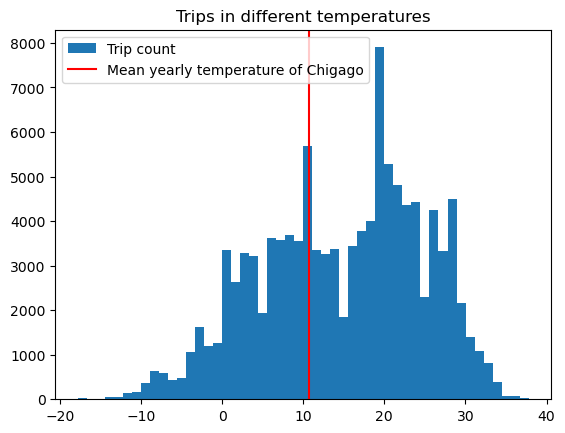

In [ ]:
# let's check how temperature affects trip count
import matplotlib.pyplot as plt

plt.hist(x=weather_rds['temp_pickup'], bins=50, label= 'Trip count')
plt.title('Trips in different temperatures')
plt.axvline(10.66, color='red', label=
'Mean yearly temperature of Chigago')
plt.legend()
plt.show()

In [ ]:
# let's check the trips/hour in very cold and hot temperatures

print(f'{weather_rds[weather_rds['temp_pickup']<= -15]['trip_id'].nunique()/weather_rds[weather_rds['temp_pickup']<= -15]['trip_start_timestamp'].dt.floor('h').nunique()} trips per hour when temperature is colder than -15 °C')
print(f'{weather_rds[weather_rds['temp_pickup']>= 25]['trip_id'].nunique()/weather_rds[weather_rds['temp_pickup']>= 25]['trip_start_timestamp'].dt.floor('h').nunique()} trips per hour when temperature is hotter than 25 °C')

7.25 trips per hour when temperature is colder than -15 °C
10.977873718294658 trips per hour when temperature is hotter than 25 °C


It seems that people are more prone to take a ride when temperature is very hot than when it is very cold

Let's check how weather affects travel time. First we check the effect of temperature, then rain, then wind speed.

              trip_seconds  temp_pickup
trip_seconds      1.000000     0.028367
temp_pickup       0.028367     1.000000


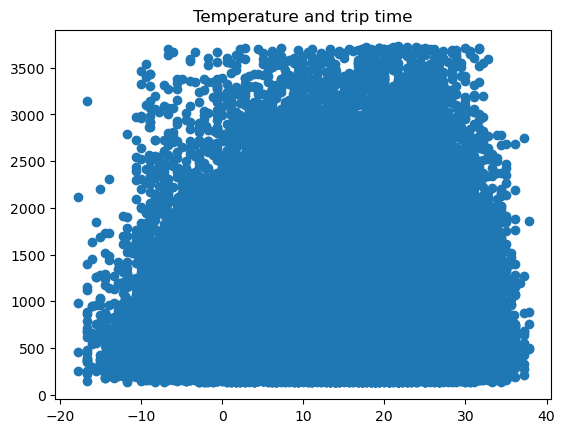

In [ ]:
print(weather_rds[['trip_seconds', 'temp_pickup']].corr())


plt.scatter(x=weather_rds['temp_pickup'], y=weather_rds['trip_seconds'])
plt.title('Temperature and trip time')
plt.show()

It seems that temperature does not affect trip time which is very sensible result.
Let's check effect of windspeed.

              trip_seconds  wspd_pickup
trip_seconds      1.000000    -0.040502
wspd_pickup      -0.040502     1.000000


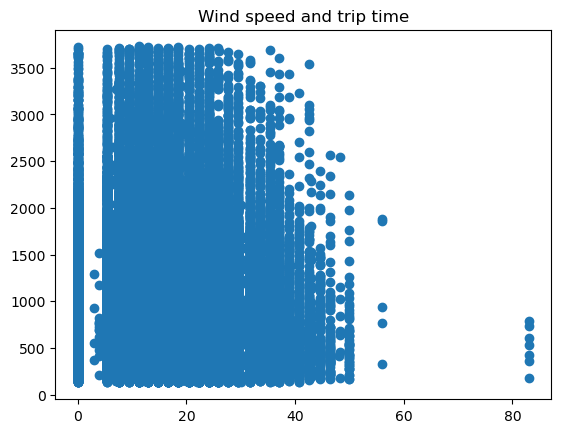

In [ ]:

print(weather_rds[['trip_seconds', 'wspd_pickup']].corr())

plt.scatter(weather_rds['wspd_pickup'], weather_rds['trip_seconds'])
plt.title('Wind speed and trip time')
plt.show()

Wind speed does not affect trip time either. Let's check effect of rain.

              trip_seconds  prcp_pickup
trip_seconds      1.000000    -0.010017
prcp_pickup      -0.010017     1.000000


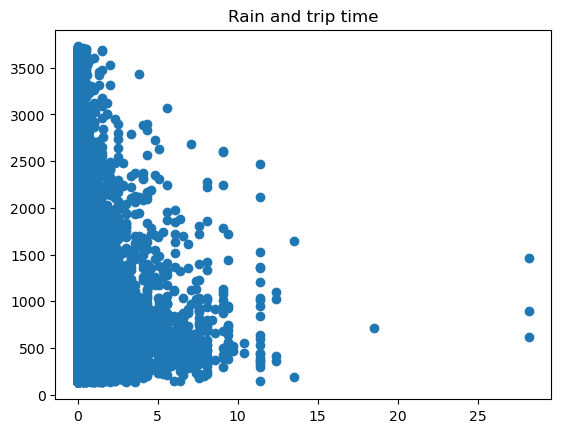

In [ ]:
print(weather_rds[['trip_seconds', 'prcp_pickup']].corr())

plt.scatter(weather_rds['prcp_pickup'], weather_rds['trip_seconds'])
plt.title('Rain and trip time')
plt.show()

Rain does not affect trip time which is little bit suprising, we would have expected even small effect. 

Let's check the effect of trip time (hour of day) on `trip_seconds`, which helps reveal patterns, e.g. morning or evening rush hour effects.


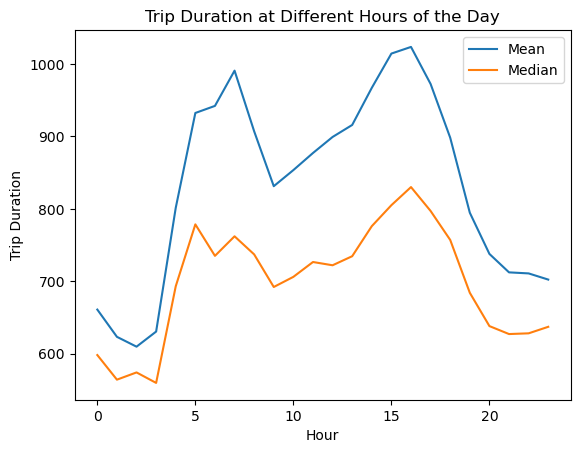

In [ ]:
# To understand how trip duration varies, we group all trips by their `start_hour` 
# and calculate both mean and median
mean_vals = weather_rds.groupby('start_hour')['trip_seconds'].mean()
median_vals = weather_rds.groupby('start_hour')['trip_seconds'].median()

plt.plot(mean_vals, label='Mean')
plt.plot(median_vals, label='Median')
plt.xlabel("Hour")
plt.ylabel("Trip Duration")
plt.title("Trip Duration at Different Hours of the Day")
plt.legend()
plt.show()

---
## Modeling

In this phase, we **build predictive models** to estimate the **trip_duration**/ `trip_seconds` based on various ride-hailing attributes given in our dataset. We will try and evaluate **two regression models**:
- Linear Regression
- … (a better model)

To evaluate and compare the performance of our predictive models, we use three widely recognized regression metrics: **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, and the **R² score**. These metrics are commonly used in both industry and academia, and were also covered in our statistics coursework.

- **RMSE** penalizes larger errors more heavily and gives sense of how far off predictions are, on average, in the same units as the target variable.
- **MAE** provides a straightforward interpretation by averaging the absolute errors, making it robust to outliers.
- **R² score** indicates the proportion of variance in the target variable that is explained by the model — a higher R² means better explanatory power.

Together, these metrics give us a balanced view of model accuracy, reliability, and generalization, making them well-suited for selecting the better-performing regression model.

In [ ]:
# setup/ importing everything (pandas already)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns




# Get prepared dataset (dropping several columns after getting errors/ warnings)
# Therefore, first find all columns with problematic datatypes
df = weather_rds
df.info()
df = weather_rds.drop(columns=[
    'trip_id', 
    'trip_start_timestamp', 
    'trip_end_timestamp', 
    'pickup_centroid_location', 
    'dropoff_centroid_location',
    'start_date_and_hour',
    'end_date_and_hour',
    'time_dropoff'
])

# Specify X and y, target column is 'trip_seconds' defining trip duration
X = df.drop(columns=['trip_seconds'])
y = df['trip_seconds']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
print(X.dtypes[X.dtypes == 'datetime64[ns]'])

start_date_and_hour    datetime64[ns]
end_date_and_hour      datetime64[ns]
time_dropoff           datetime64[ns]
dtype: object


### Model 1: Linear Regression

Linear Regression is used here as a baseline model. It assumes a linear relationship between the input features and the target variable (trip duration/ `trip_seconds`).

Since, …, we dropped all columns with datetime datatypes or object as a datatype.

In [ ]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  MAE : {mae_lr:.2f}")
print(f"  R²  : {r2_lr:.2f}")

Linear Regression Performance:
  RMSE: 304.85
  MAE : 210.68
  R²  : 0.71


### Model 2: Random Forest Regressor

Random Forest is an ensemble model that builds multiple decision trees and averages their results. It can capture complex nonlinear relationships and interactions between features.


In [76]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  MAE : {mae_rf:.2f}")
print(f"  R²  : {r2_rf:.2f}")

Random Forest Performance:
  RMSE: 224.85
  MAE : 151.82
  R²  : 0.84


### Evaluation

We built two regression models to predict trip duration:

1. **Linear Regression**
2. **Random Forest Regressor**

#### Model Performance Comparison

| Metric | Linear Regression | Random Forest |
|--------|-------------------|----------------|
| **RMSE** | 304.85 seconds | **224.85 seconds** |
| **MAE**  | 210.68 seconds | **151.82 seconds** |
| **R²**   | 0.71            | **0.84** |

#### Interpretation

The Random Forest model significantly outperformed Linear Regression across all metrics. It achieved a lower Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), and it explained more variance in the data (higher R²). This indicates that it is better suited for capturing the non-linear relationships in the dataset.

#### Conclusion

We selected the **Random Forest Regressor** as the final model due to its superior predictive performance.


### Visual

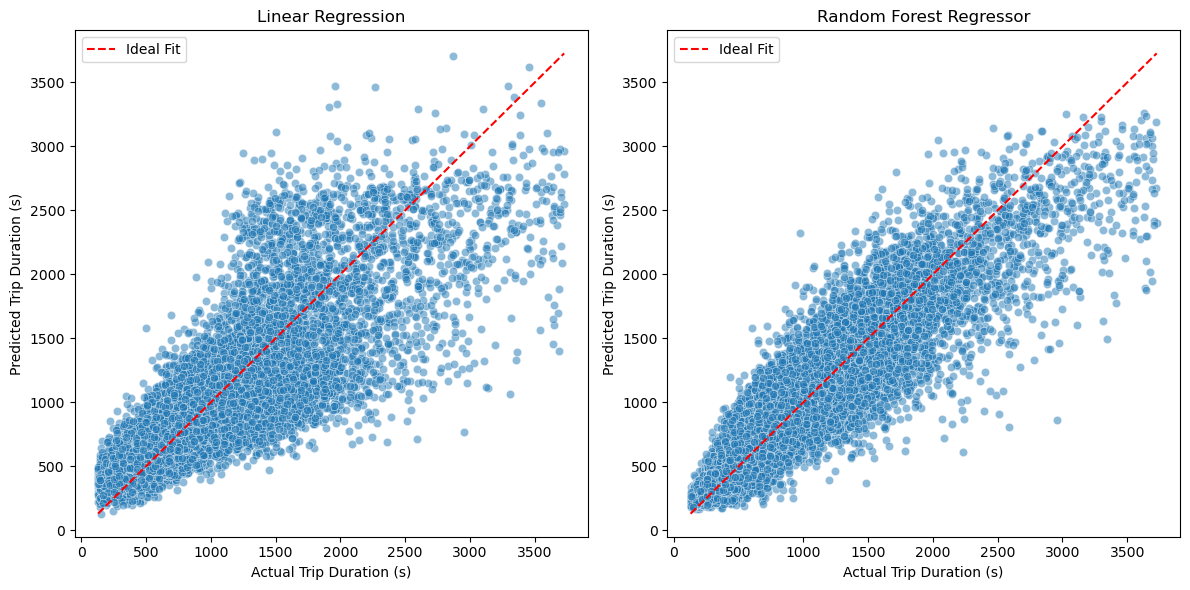

In [77]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)  # Assuming rf is your trained Random Forest

# Plotting
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Trip Duration (s)')
plt.ylabel('Predicted Trip Duration (s)')
plt.title('Linear Regression')
plt.legend()

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Trip Duration (s)')
plt.ylabel('Predicted Trip Duration (s)')
plt.title('Random Forest Regressor')
plt.legend()

plt.tight_layout()
plt.show()


### Feature Importance


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



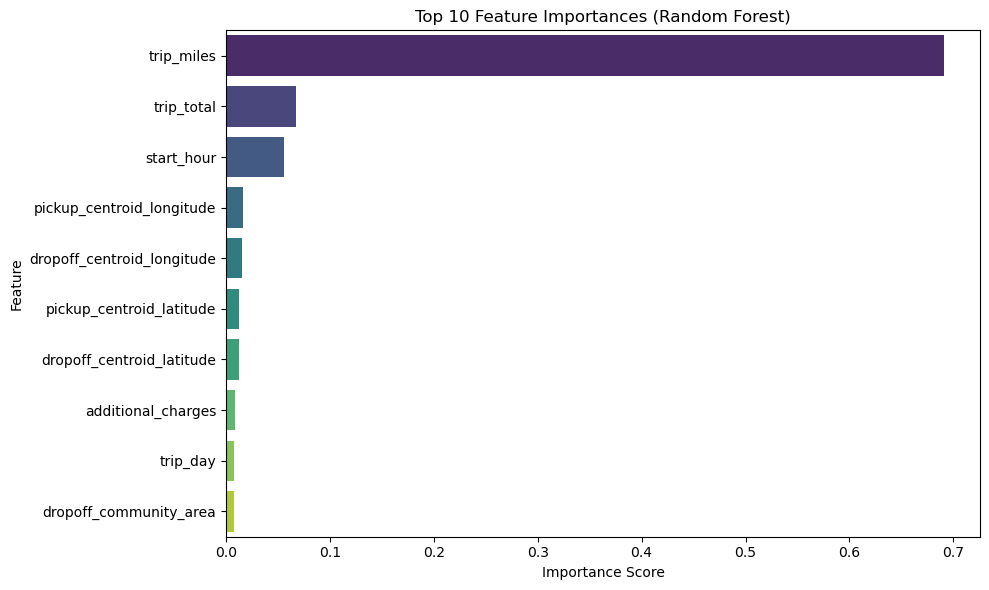

In [79]:
# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_  # or best_rf.feature_importances_ if you did tuning
feature_names = X.columns

# Create a pandas Series and sort it
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the top 10 most important features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
